In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae',
 '/opt/conda/lib/python38.zip',
 '/opt/conda/lib/python3.8',
 '/opt/conda/lib/python3.8/lib-dynload',
 '',
 '/home/blessyantony/.local/lib/python3.8/site-packages',
 '/opt/conda/lib/python3.8/site-packages',
 '/opt/conda/lib/python3.8/site-packages/IPython/extensions',
 '/home/blessyantony/.ipython',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../..']

In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from src.utils import utils, evaluation_utils, visualization_utils
from sklearn.metrics import auc, precision_recall_curve
from statistics import mean
from datetime import datetime

In [3]:
# file_paths = {
#     "msl128vs30_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240824/sars-cov-2/uniref90/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
#     "msl128vs30cls_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240808/sars-cov-2/uniref90/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv"),
#     "msl256vs30_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240808/sars-cov-2/uniref90/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
#     "msl256vs30cls_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240808/sars-cov-2/uniref90/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv")
# }

file_paths = {
    "msl128vs30_ae_bn_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240829/sars-cov-2/uniref90/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128ae_bn_vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    "msl128vs30cls_ae_bn_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240829/sars-cov-2/uniref90/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128ae_bn_vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    "msl256vs30_ae_bn_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240829/sars-cov-2/uniref90/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256ae_bn_vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    "msl256vs30cls_ae_bn_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240829/sars-cov-2/uniref90/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256ae_bn_vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv")
}

In [4]:
dfs = []
for k, v in file_paths.items():
    df = pd.read_csv(v)
    df["model"] = k
    df["id"] = df["id"].str.extract(r"\['(.+)'\]")
    index_seq_pred = df[df["id"] == "WIV04"]["Human"].values[0]
    df["Human_pred_diff"] = df["Human"] - index_seq_pred
    dfs.append(df)
df = pd.concat(dfs)
df

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,id,y_true,model,Human_pred_diff
0,0.007430,0.000044,0.628259,0.016068,0.002290,0.092862,0.218746,0.034301,UFO69279.1,Human,msl128vs30_ae_bn_s64_UA,-0.070930
1,0.011747,0.000092,0.509178,0.028178,0.005324,0.126039,0.268125,0.051316,QWE88920.1,Human,msl128vs30_ae_bn_s64_UA,-0.021551
2,0.017087,0.000073,0.472319,0.037818,0.005928,0.117885,0.296021,0.052870,QTJ90974.1,Human,msl128vs30_ae_bn_s64_UA,0.006345
3,0.007685,0.000100,0.621308,0.023708,0.003620,0.112283,0.197077,0.034219,QRN78347.1,Human,msl128vs30_ae_bn_s64_UA,-0.092599
4,0.010206,0.000027,0.535851,0.040551,0.003296,0.069105,0.289675,0.051288,WIV04,Human,msl128vs30_ae_bn_s64_UA,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
13,0.024972,0.000010,0.136928,0.021972,0.004758,0.035232,0.760148,0.015979,QRX39425.1,Human,msl256vs30cls_ae_bn_s64_UA,0.018587
14,0.054295,0.000027,0.706466,0.004092,0.001933,0.051864,0.175106,0.006216,WRK13149.1,Human,msl256vs30cls_ae_bn_s64_UA,-0.566456
15,0.040101,0.000005,0.614859,0.024371,0.003751,0.032906,0.273032,0.010976,QWE88920.1,Human,msl256vs30cls_ae_bn_s64_UA,-0.468529
16,0.071236,0.000006,0.546967,0.016970,0.003257,0.059679,0.294267,0.007618,UFO69279.1,Human,msl256vs30cls_ae_bn_s64_UA,-0.447294


In [5]:
df

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,id,y_true,model,Human_pred_diff
0,0.007430,0.000044,0.628259,0.016068,0.002290,0.092862,0.218746,0.034301,UFO69279.1,Human,msl128vs30_ae_bn_s64_UA,-0.070930
1,0.011747,0.000092,0.509178,0.028178,0.005324,0.126039,0.268125,0.051316,QWE88920.1,Human,msl128vs30_ae_bn_s64_UA,-0.021551
2,0.017087,0.000073,0.472319,0.037818,0.005928,0.117885,0.296021,0.052870,QTJ90974.1,Human,msl128vs30_ae_bn_s64_UA,0.006345
3,0.007685,0.000100,0.621308,0.023708,0.003620,0.112283,0.197077,0.034219,QRN78347.1,Human,msl128vs30_ae_bn_s64_UA,-0.092599
4,0.010206,0.000027,0.535851,0.040551,0.003296,0.069105,0.289675,0.051288,WIV04,Human,msl128vs30_ae_bn_s64_UA,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
13,0.024972,0.000010,0.136928,0.021972,0.004758,0.035232,0.760148,0.015979,QRX39425.1,Human,msl256vs30cls_ae_bn_s64_UA,0.018587
14,0.054295,0.000027,0.706466,0.004092,0.001933,0.051864,0.175106,0.006216,WRK13149.1,Human,msl256vs30cls_ae_bn_s64_UA,-0.566456
15,0.040101,0.000005,0.614859,0.024371,0.003751,0.032906,0.273032,0.010976,QWE88920.1,Human,msl256vs30cls_ae_bn_s64_UA,-0.468529
16,0.071236,0.000006,0.546967,0.016970,0.003257,0.059679,0.294267,0.007618,UFO69279.1,Human,msl256vs30cls_ae_bn_s64_UA,-0.447294


In [6]:
mapping_df = pd.read_csv(os.path.join(os.getcwd(), "..","..", "..", "..", "input/data/coronaviridae/20240313/wiv04/SARS_CoV_2_Variants_ViralZone.csv"))

In [7]:
mapping_df["emergence_date"] = mapping_df["emergence_date"].apply(lambda x: datetime.strftime(datetime.strptime(x, '%b-%y'), '%m/%Y'))
mapping_df["emergence_date"] = pd.to_datetime(mapping_df["emergence_date"])

In [8]:
df = df.merge(mapping_df[["seq", "pango_lineage", "emergence_date"]], how="left", left_on="id", right_on="seq")

In [9]:
order = list(df.sort_values(by="emergence_date")["pango_lineage"].unique())
order

['WIV04',
 'B.1.1.28.1',
 'B.1.351',
 'B.1.1.7',
 'B.1.427, B.1.429',
 'B.1.1.28.2',
 'B.1.526',
 'B.1.617.2',
 'B.1.525',
 'B.1.1.1.C37',
 'B.1.617.1',
 'BA.1',
 'BA.5',
 'BA.4',
 'BQ.1.1',
 'XBB.1.5',
 'EG.5.1',
 'JN.1']

In [10]:
df[df["id"] == "WIV04"]["pango_lineage"] = "WIV04"
df[df["id"] == "WIV04"]

/tmp/ipykernel_2400356/3832981000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["id"] == "WIV04"]["pango_lineage"] = "WIV04"


,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,id,y_true,model,Human_pred_diff,seq,pango_lineage,emergence_date
4,0.010206,0.000027,0.535851,0.040551,0.003296,0.069105,0.289675,0.051288,WIV04,Human,msl128vs30_ae_bn_s64_UA,0.0,WIV04,WIV04,2019-12-01
22,0.010963,0.000005,0.453975,0.018680,0.013922,0.008470,0.469685,0.024300,WIV04,Human,msl128vs30cls_ae_bn_s64_UA,0.0,WIV04,WIV04,2019-12-01
46,0.008645,0.000028,0.686265,0.002298,0.004152,0.009203,0.283625,0.005784,WIV04,Human,msl256vs30_ae_bn_s64_UA,0.0,WIV04,WIV04,2019-12-01
65,0.025957,0.000005,0.154282,0.018977,0.003929,0.032119,0.741561,0.023170,WIV04,Human,msl256vs30cls_ae_bn_s64_UA,0.0,WIV04,WIV04,2019-12-01


In [11]:
df

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,id,y_true,model,Human_pred_diff,seq,pango_lineage,emergence_date
0,0.007430,0.000044,0.628259,0.016068,0.002290,0.092862,0.218746,0.034301,UFO69279.1,Human,msl128vs30_ae_bn_s64_UA,-0.070930,UFO69279.1,BA.1,2021-12-01
1,0.011747,0.000092,0.509178,0.028178,0.005324,0.126039,0.268125,0.051316,QWE88920.1,Human,msl128vs30_ae_bn_s64_UA,-0.021551,QWE88920.1,B.1.1.7,2020-09-01
2,0.017087,0.000073,0.472319,0.037818,0.005928,0.117885,0.296021,0.052870,QTJ90974.1,Human,msl128vs30_ae_bn_s64_UA,0.006345,QTJ90974.1,B.1.1.1.C37,2020-12-01
3,0.007685,0.000100,0.621308,0.023708,0.003620,0.112283,0.197077,0.034219,QRN78347.1,Human,msl128vs30_ae_bn_s64_UA,-0.092599,QRN78347.1,B.1.351,2020-08-01
4,0.010206,0.000027,0.535851,0.040551,0.003296,0.069105,0.289675,0.051288,WIV04,Human,msl128vs30_ae_bn_s64_UA,0.000000,WIV04,WIV04,2019-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.024972,0.000010,0.136928,0.021972,0.004758,0.035232,0.760148,0.015979,QRX39425.1,Human,msl256vs30cls_ae_bn_s64_UA,0.018587,QRX39425.1,B.1.1.28.1,2020-07-01
68,0.054295,0.000027,0.706466,0.004092,0.001933,0.051864,0.175106,0.006216,WRK13149.1,Human,msl256vs30cls_ae_bn_s64_UA,-0.566456,WRK13149.1,JN.1,2023-01-01
69,0.040101,0.000005,0.614859,0.024371,0.003751,0.032906,0.273032,0.010976,QWE88920.1,Human,msl256vs30cls_ae_bn_s64_UA,-0.468529,QWE88920.1,B.1.1.7,2020-09-01
70,0.071236,0.000006,0.546967,0.016970,0.003257,0.059679,0.294267,0.007618,UFO69279.1,Human,msl256vs30cls_ae_bn_s64_UA,-0.447294,UFO69279.1,BA.1,2021-12-01


<Figure size 432x288 with 0 Axes>

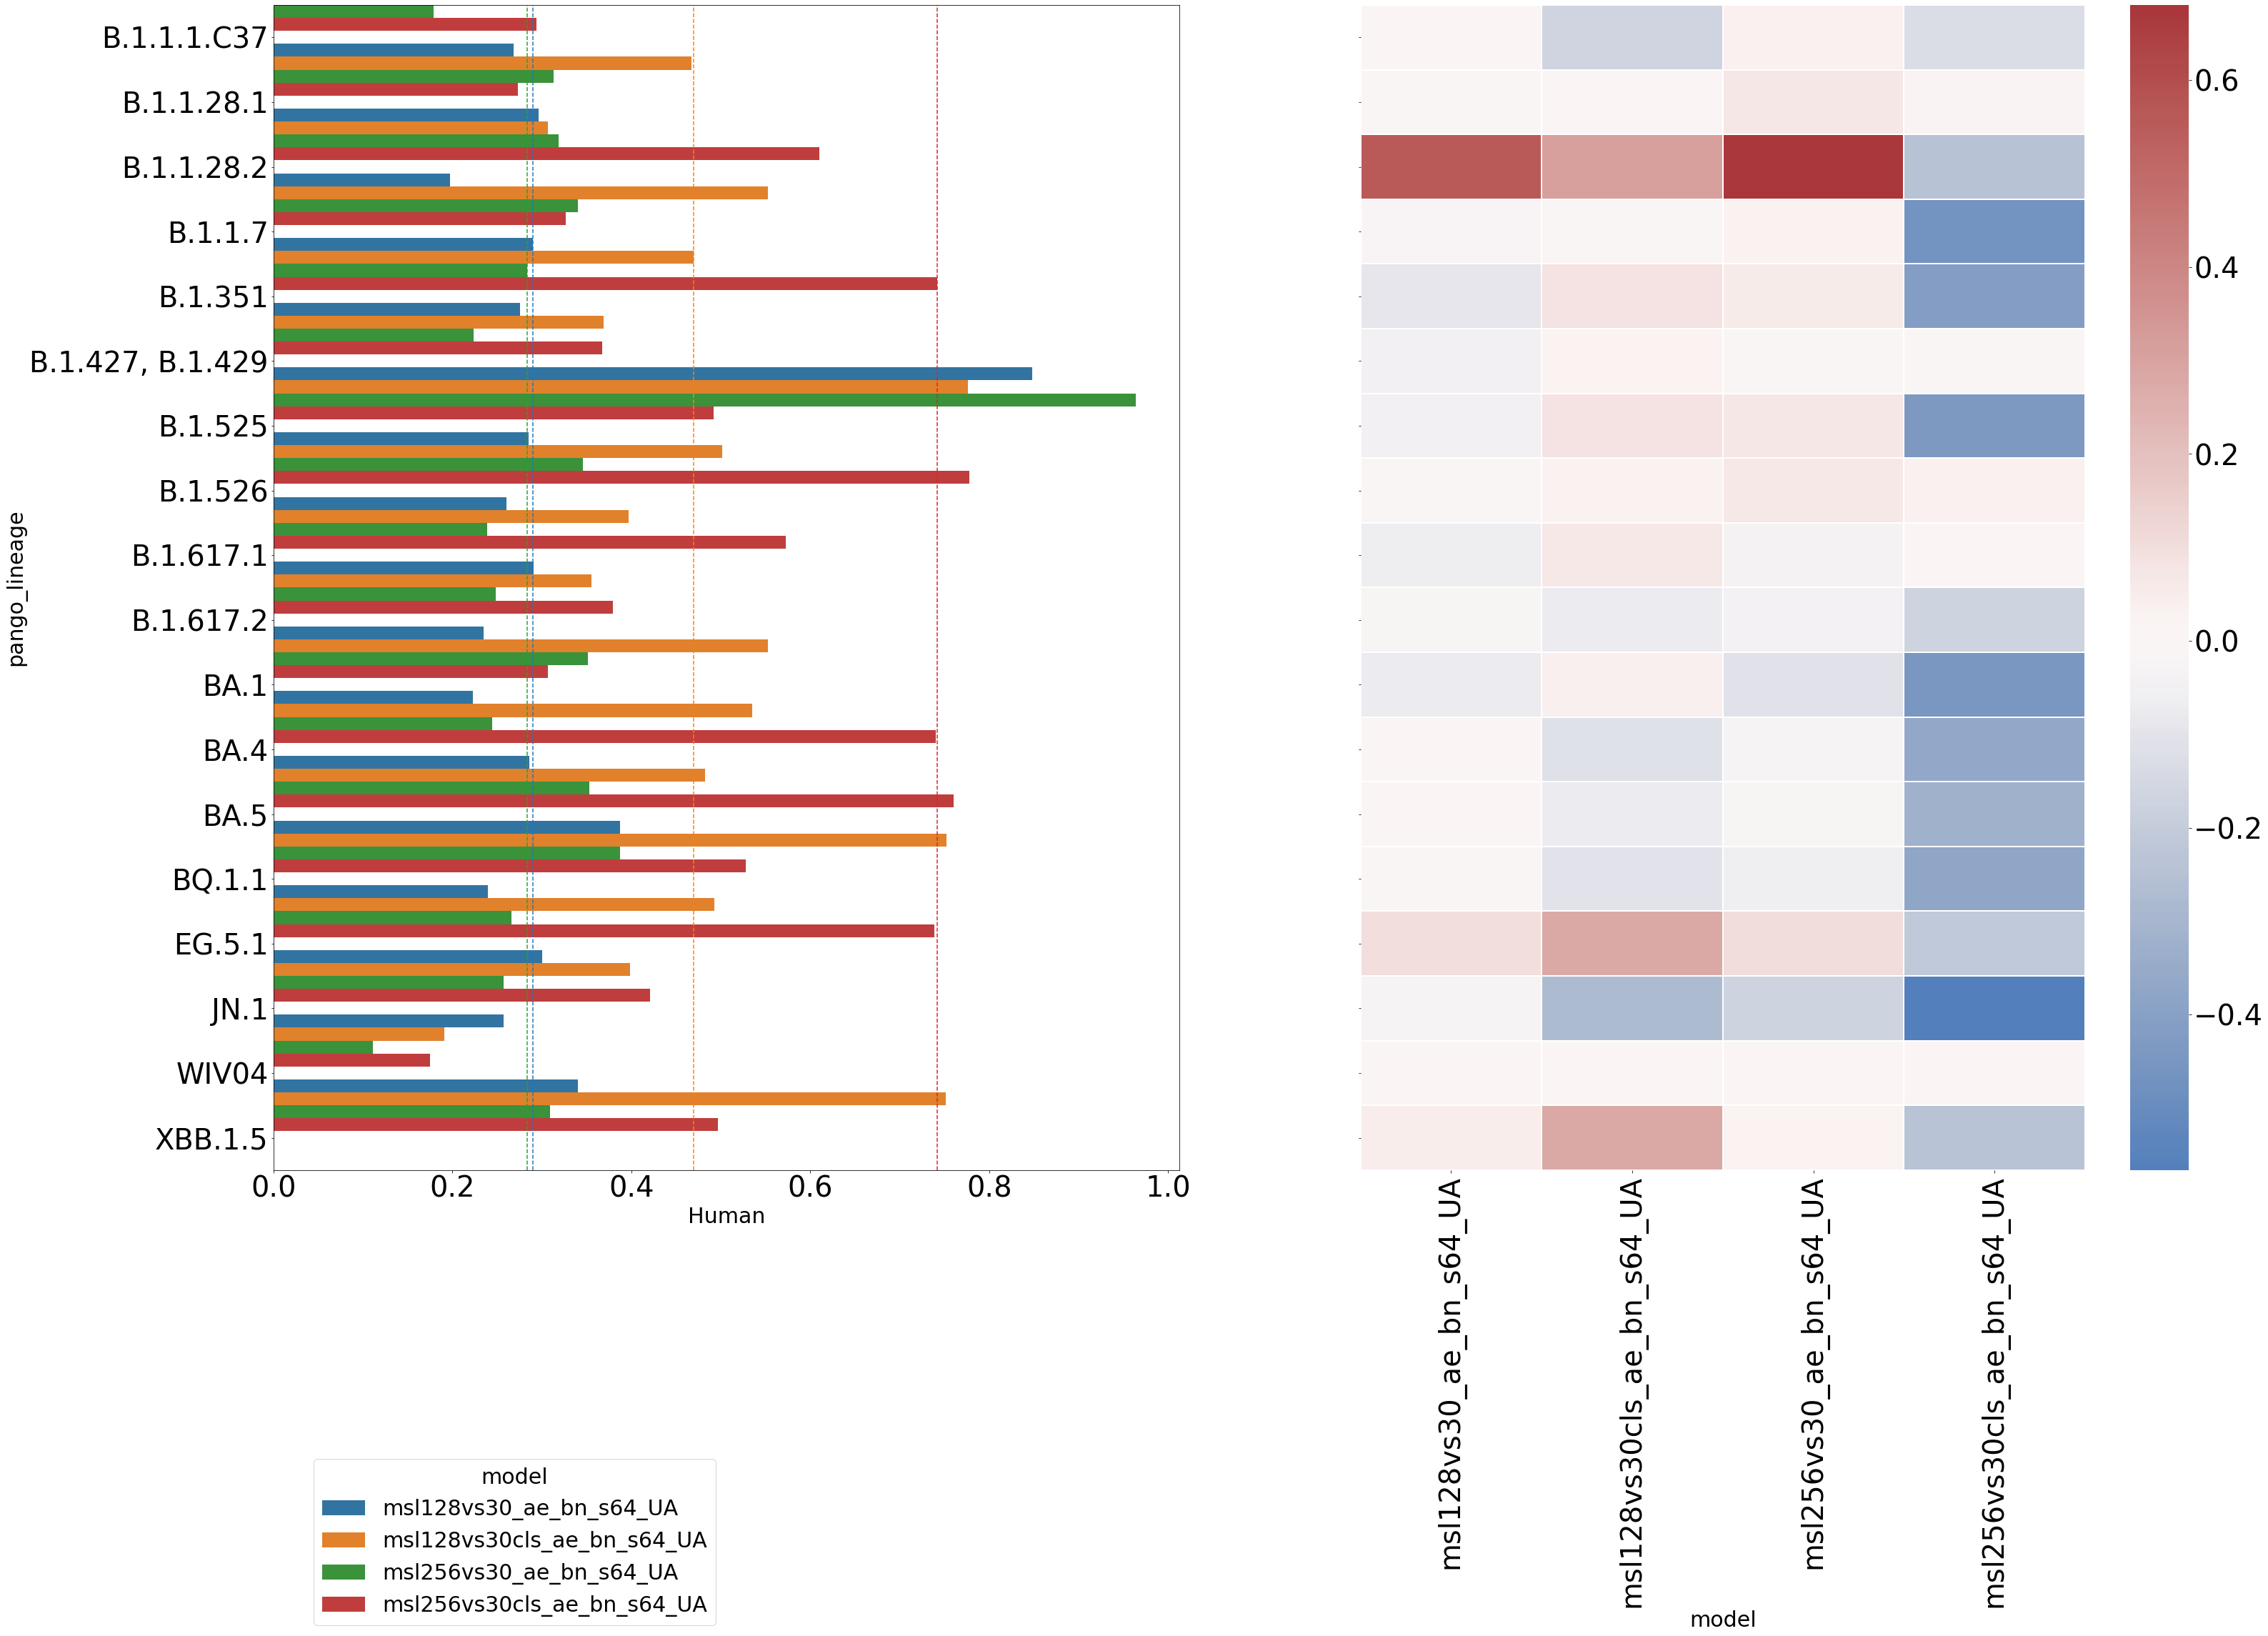

In [22]:
plt.clf()
plt.rcParams['xtick.labelsize'] = 40
plt.rcParams['ytick.labelsize'] = 40
plt.rcParams.update({'font.size': 30})

fig, axs = plt.subplots(1, 2, figsize=(50, 30), sharex=False, sharey=True)

colors = sns.color_palette('tab10')
models = list(df["model"].unique())

color_palette_dict = {k: v for k, v in zip(models, colors)}

sns.barplot(df, y="pango_lineage", x="Human", hue="model", ax=axs[0])
               # boxprops={"facecolor": (.3, .5, .7, .5)})
sns.move_legend(axs[0], "lower right", bbox_to_anchor=(.5, -.4))

for model, color in zip(models, colors):
    axs[0].axvline(df[(df["model"] == model) & (df["id"] == "WIV04")]["Human"].values[0], color=color, linestyle="--")

    
sns.heatmap(df.pivot(index="pango_lineage", columns="model", values="Human_pred_diff"), ax=axs[1], linewidth=.1, center=0, cmap="vlag")
axs[1].set_ylabel("")
plt.show()

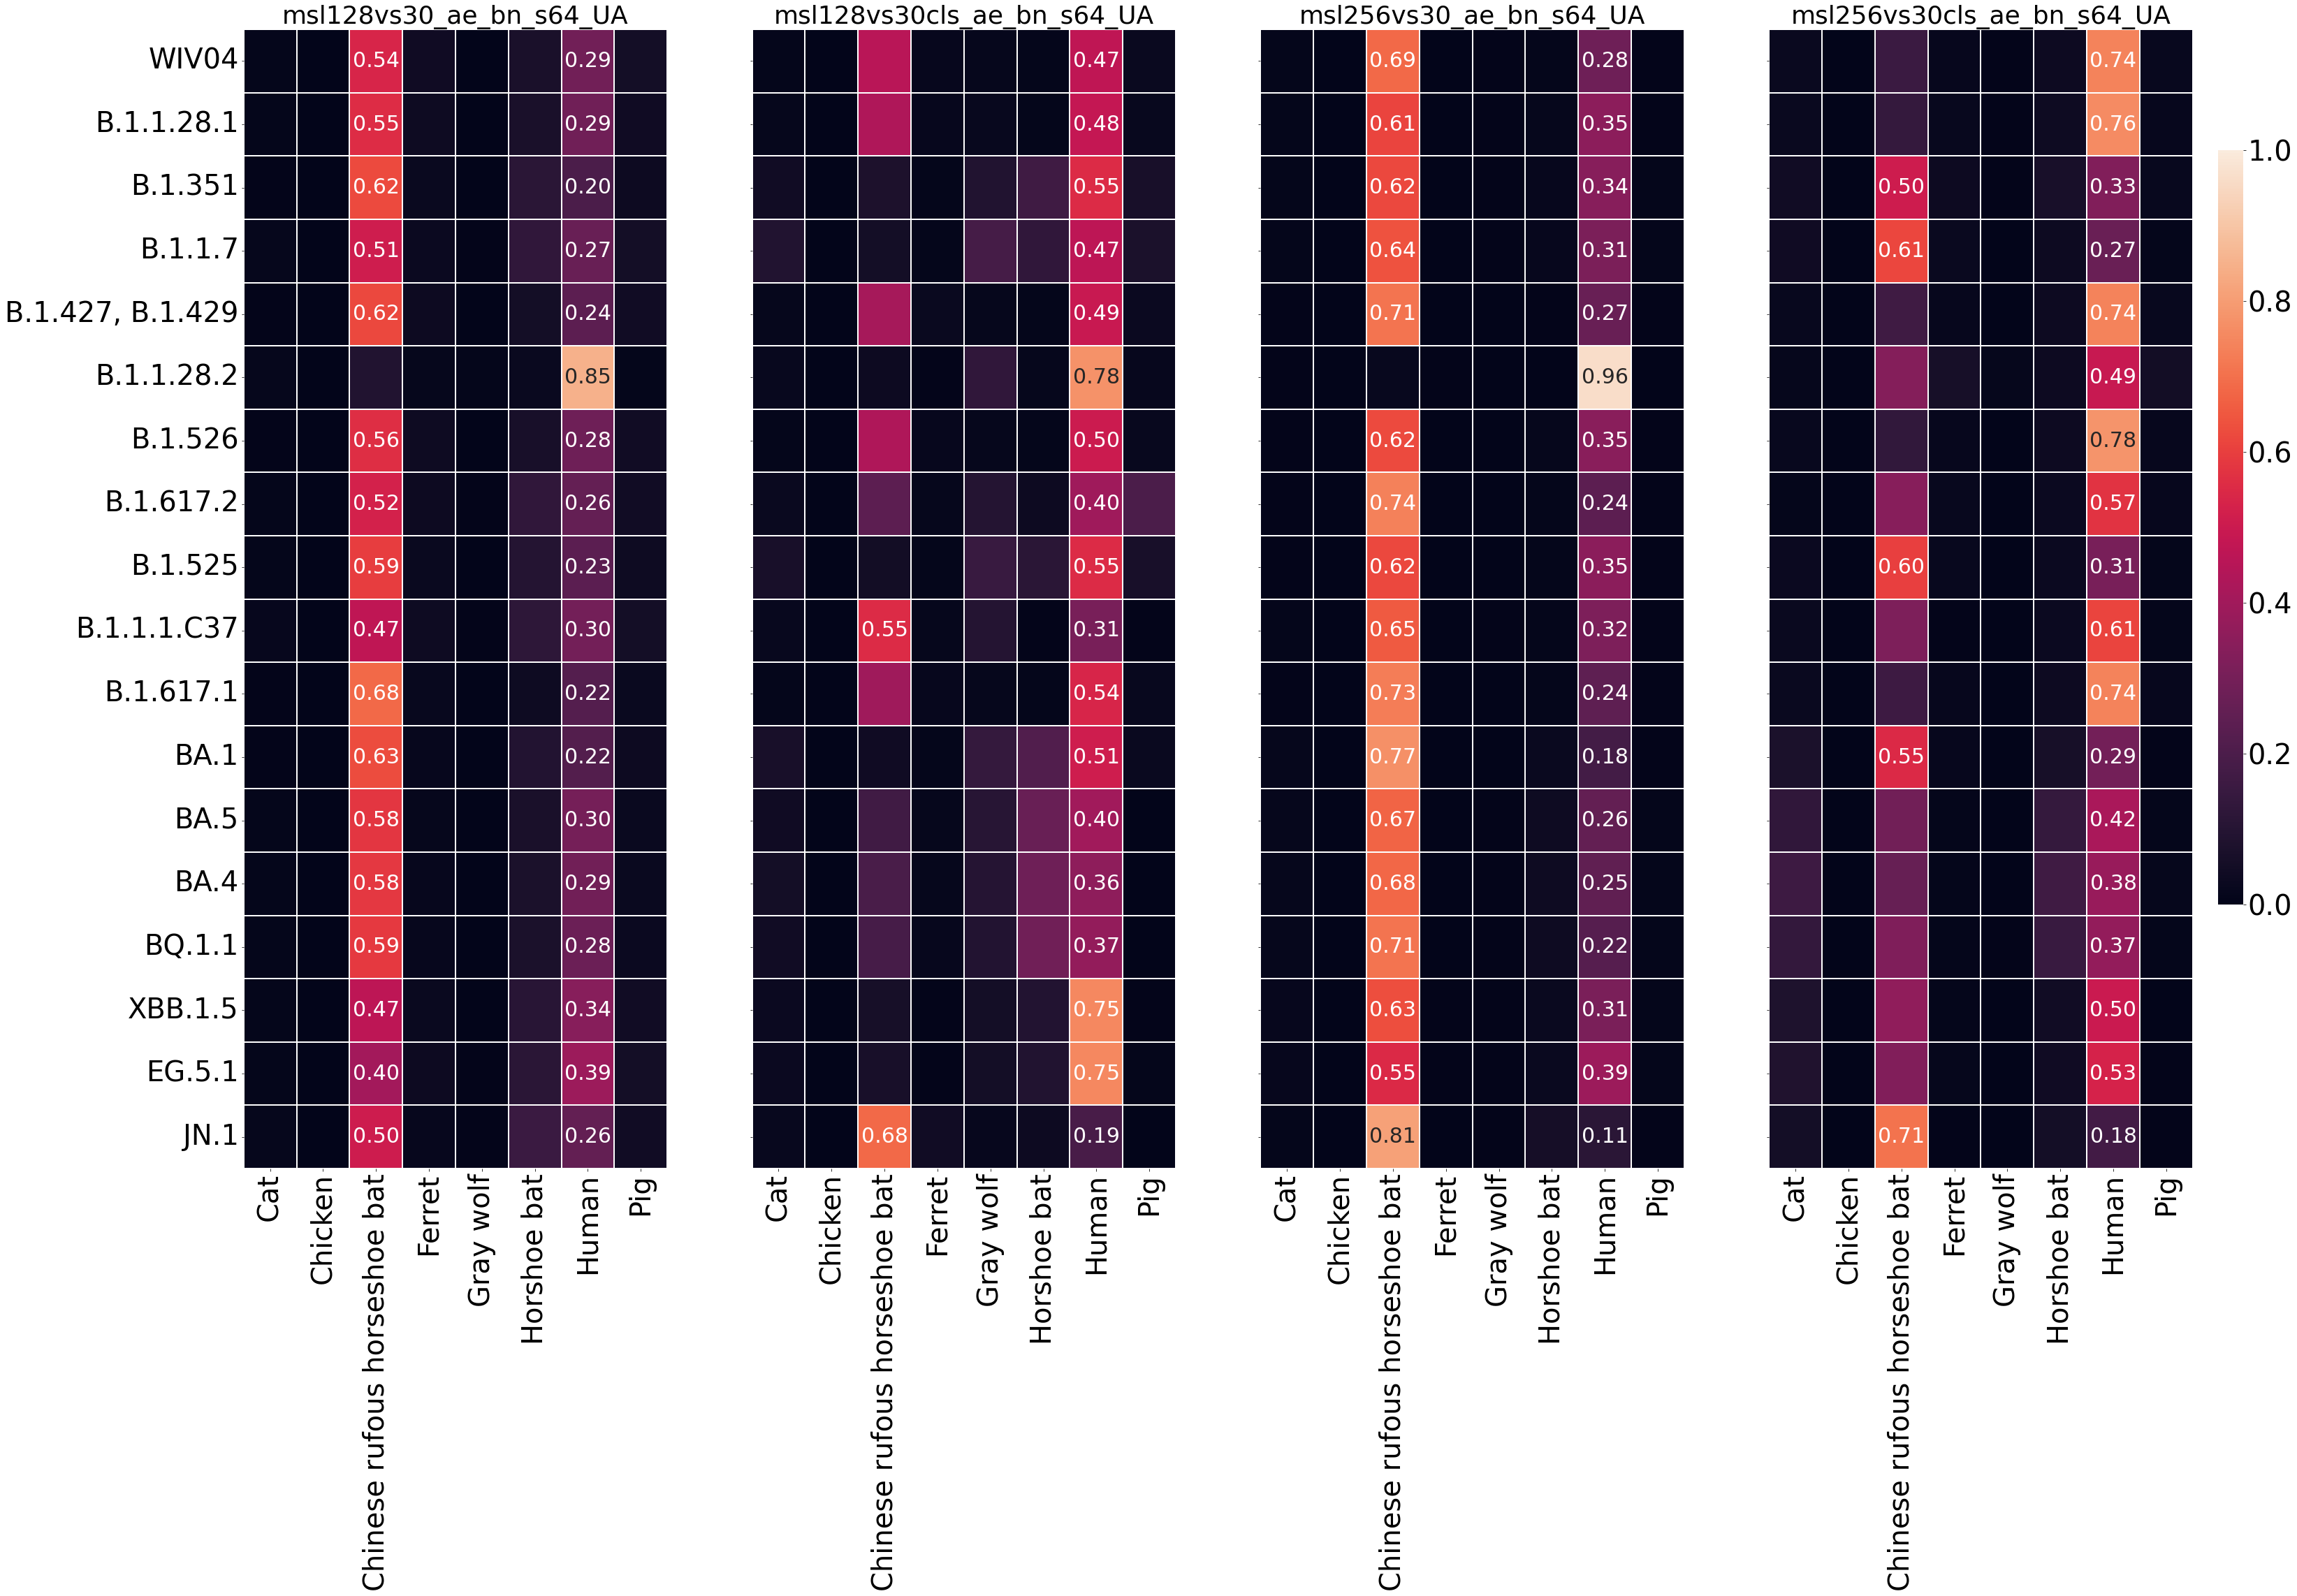

In [20]:
def get_annotation_df(heatmap_df):
    annot_df = pd.DataFrame(0, index=heatmap_df.index, columns=heatmap_df.columns)
    annot_idx = heatmap_df.idxmax(axis=1).reset_index()
    for item in annot_idx.values:
        annot_df.loc[item[0], item[1]] = "{:,.2f}".format(heatmap_df.loc[item[0], item[1]])
        annot_df.loc[item[0], "Human"] = "{:,.2f}".format(heatmap_df.loc[item[0], "Human"])

    annot_df = annot_df.astype(str)
    annot_df[annot_df == "0"] = ""
    
    return annot_df

fig, axs = plt.subplots(1, 4, figsize=(50, 30), sharex=False, sharey=True)

cbar_ax = fig.add_axes([.91, .3, .01, .5])
for i, model in enumerate(models):
    heatmap_df = df[df["model"] == model][["Cat", "Chicken", "Chinese rufous horseshoe bat", "Ferret", "Gray wolf", "Horshoe bat", "Human", "Pig", "pango_lineage"]].set_index("pango_lineage").reindex(index=order)
    get_annotation_df(heatmap_df)
    sns.heatmap(heatmap_df, ax=axs[i], linewidth=.1, 
                annot=get_annotation_df(heatmap_df), fmt="",
                vmin=0, vmax=1,
                cbar=i == 0, 
                cbar_ax=None if i != 0 else cbar_ax)
    axs[i].set_title(model)
    axs[i].set(xlabel="", ylabel="")

plt.show()